In [348]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import missingno
from sklearn.cluster import KMeans

from word2number import w2n
import matplotlib.pyplot as plt

# read the textfile with the automobile data
auto_df = pd.read_csv("automobile.txt", sep=",")

# 1. Introduction

## 1.1 Description

The automotive data set contains 205 observations of vehicles from 22 car makers. This data set contains automotives ranging from luxury vehicles (Mercedes-Benz, BMW) to budget friendly options (Dodge, Chevrolet). It is a good representation of the overall automotive market. 

The data set to be analysed contains vehicle technical specifications that include engine internal properties, exterior physical properties, insurance characteristics, and cost of vehicles. The set has been serialised into 26 columns. This data set seems to have been obtained in 1985.

This data can be used by various sectors ranging from insurance to vehicle fleet management by private organisation and/or government institutions. The symbolling and normalised losses variables are of interest for insurance purposes to decide on the premiums to be charged on vehicle owners or users. Fleet management (car rentals, some government departments, etc) are likely to be interested in the price, body-style, number of doors, etc for the transportation of people and light baggage.


In [349]:
# Number of observations and columns
auto_df.shape

(205, 26)

## 1.2 Purpose of EDA 

The objective of this EDA is to gain insights about the automotive data set. It is to gain an understanding of the structure of the data set including the variables and their data types. The exercise will also identify parameters or other information that is missing in the data set which can be used to benefit decision makers. Data will also be contextualised to get a better understanding of its meaning and purpose. 

The EDA will extract the following information:
* Errors in the data set
* Outliers and Anomalies or noise
* Variable types and Meaning 


Various relationships between variables will be brought to light. We will also at look trends that can be used to predict other variables that are beneficial for business decisions such as price, insurance risk rating, etc. What factors affect the price of a vehicle? What increases the risk rating of a vehicle and what influences the loss payment per insured vehicle?

Engineering specifications of automobiles will also be looked at to gain insights that affect the technical specifications of automobiles. Does the curb-weight of a vehicle affect the engine size to be installed and the type of aspiration required for this engine? What are prevalent features of a vehicle and the reasons thereof?

# 2. Automobile Data Description

## 2.1 Introduction and Data Description

The data is of mixed type comprising of both categorical and continuous variables.

- symboling: assigned insurance risk rating of the car [ORDINAL]
- normalized-losses: relative average loss payment per insured vehicle [RATIO]
- make: brand of the car [NOMINAL]
- fuel-type: type of fuel used by the car [DICHOTOMOUS]
- aspiration: type of aspiration system used by the car [DICHOTOMOUS]
- num-of-doors: number of doors on the car [ODRDINAL]
- body-style: body style of the car [NOMINAL]
- drive-wheels: type of drive wheels used by the car [ORDINAL]
- engine-location: location of the engine in the car [DICHOTOMOUS]
- wheel-base: distance between the centers of the front and rear wheels of the car [RATIO]
- length: length of the car [RATIO]
- width: width of the car [RATIO]
- height: height of the car [RATIO]
- curb-weight: weight of the car without occupants or baggage [RATIO]
- engine-type: type of engine used in the car [NOMINAL]
- num-of-cylinders: number of cylinders in the engine [ORDINAL]
- engine-size: size of the engine in cubic centimeters [RATIO]
- fuel-system: type of fuel system used by the car [NOMINAL]
- bore: diameter of the cylinders in the engine [RATIO]
- stroke: length of the piston stroke in the engine [RATIO]
- compression-ratio: ratio of the volume of the combustion chamber when the piston is at the bottom of its stroke to the volume of the combustion chamber when the piston is at the top of its stroke [RATIO]
- horsepower: maximum power output of the engine in horsepower units [RATIO]
- peak-rpm: revolutions per minute at which the engine produces its maximum power output [RATIO]
- city-mpg: miles per gallon (MPG) of the car in city [RATIO]
- highway-mpg: MPG of the car in highway [RATIO]
- price: manufacturer's retail price (MSRP) of the car [RATIO]

In [350]:
# dataframe columns or series
auto_df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

## 2.2 Structure of Data (Format & Data Types)

The data types of variables are shown below. Notice how variables with missing values have higher order data structures assigned to them since they contain mixed types. 

The following variables with missing values are floating type: normalized-losses, bore, stroke, horsepower, peak-rpm, and price. The num-of-doors categorical variable also has missing data points. The number of doors and number of cylinders variables are in non-numerical format of which they need to be in a numerical format for use in the analysis. These variables will be encoded.

Missing variables will be fully explored and handled in the next chapter in accordance to their type of missingness.

Exploring the units or format of bore and stroke we realise that these variables are in centimeters (Metric Units) which are preferable to us. The city-mpg and highway-mpg are in miles per gallon and must be converted to metric units with the typical format of Liters per 100 km. Wheel base, length, width, and height are in inches and must be converted to metric meters. ENgine size is in cubic inches and will be converted to liters. Horsepower will be converted to kilo watts.

Curb-weight is in kilograms and is acceptable. Price is likely to be in US dollars and will be cceptable in this currency.
Compression-ratio, and peak-rpm are in acceptable format of units. 

In [351]:
# dataframe columns and the data types stored in these columns
print(auto_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## 2.3 Statistical Summary

In [352]:
# A statistical descriptive overview of the data 
auto_df.describe(include = 'all')


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


# 3 Cleaning (Missing, Duplications, Redundancy, and Formatting)

## 3.1 Missing Values

As per the below, there appears not to be any missing data. Meaning there are no empty cells. However, there are inconsistent data types in some series. There are missing data points as will be seen in the following section 3.1.1

In [353]:
# Columns with missing data
print('The Number of missing Data values are tabulated below:\n')
print(auto_df.isna().sum())

The Number of missing Data values are tabulated below:

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


#### 3.1.1 Missing Continuous Data

#### a. Price Imputation

There are question marks '?' in normalized-losses, bore, stroke, horsepower,	peak-rpm, and price series. The cumulative count of missing continuous data is 23% percent of all rows for the data. Given that there are other series with missing information, this is a significant amount to be dropped. We will run imputation using interpolation on price values for each car make. Price is MNAR as it is related to a car's make, curb weight, horsepower, external dimensions, and other factors.

In [354]:
# see which values are missing for the bore and stroke columns
column_list = ['price', 'engine-size', 'curb-weight', 'horsepower', 'make']
print('The following automobiles have missing prices:')
print(auto_df.loc[(auto_df['price'] == '?'),column_list])

df_list = ['price', 'curb-weight', 'horsepower']

# convert all to numeric and coerce non-numeric to np.NaN
auto_df[df_list] = auto_df[df_list].apply(pd.to_numeric, errors='coerce')

# temporarily drop all NaN values
auto_df.dropna(subset=['price', 'curb-weight', 'horsepower'])

# Print correlation coefficients between df_list columns
print()
for col1 in df_list:
    for col2 in df_list:
        if col1 < col2:
            auto = auto_df[~auto_df[col1].isna() & ~auto_df[col2].isna()]
            print(f'Correlation of {col1} - {col2} is : ', np.corrcoef(auto[col1], auto[col2])[0, 1])

# interpolate missing prices for each make
print()
for imput_car in auto_df.loc[auto_df['price'].isna()]['make'].unique():
    
    auto_df.loc[auto_df['make'] == imput_car, ['price']] = auto_df.loc[auto_df['make'] == imput_car, ['price']].interpolate(method='linear', limit_direction='both')
    
    print(imput_car)
    print(auto_df.loc[auto_df['make'] == imput_car, df_list], '\n')

The following automobiles have missing prices:
    price  engine-size  curb-weight horsepower     make
9       ?          131         3053        160     audi
44      ?           90         1874         70    isuzu
45      ?           90         1909         70    isuzu
129     ?          203         3366        288  porsche

Correlation of curb-weight - price is :  0.8344145257702846
Correlation of curb-weight - horsepower is :  0.751034274586471
Correlation of horsepower - price is :  0.8105330821322058

audi
     price  curb-weight  horsepower
3  13950.0         2337       102.0
4  17450.0         2824       115.0
5  15250.0         2507       110.0
6  17710.0         2844       110.0
7  18920.0         2954       110.0
8  23875.0         3086       140.0
9  23875.0         3053       160.0 

isuzu
      price  curb-weight  horsepower
43   6785.0         2337        78.0
44   8206.0         1874        70.0
45   9627.0         1909        70.0
46  11048.0         2734        90.0 



#### b. Normalized-Losses

The normalized losses are missing completely at random (MCAR). These values, similar to symboling risk factors are derived from factors not inherently related to the specifications of an automobile. They are derived by insurance companies and have little correlation to the mechanical and physical properties of a car. So as not o loose data, missing values will be converted to numpy's NaN values.

In [355]:
# convert all to numeric and coerce non-numeric to np.NaN
auto_df['normalized-losses'] = auto_df['normalized-losses'].apply(pd.to_numeric, errors='coerce')

#### c. Bore & Stroke

The missing categorical data for bore and stroke are as a result of the nature of these variables for a rotary engine. A rotor type or rotary engine is a combustion engine that uses a rotor(s) instead of the popular reciprocating pistons to convert fuel into mechanical energy. In general a rotary engine consists of a rotor that is reuleaux triangle shaped (a traingle with sides curved in) rotating in a stadium shaped chamber. Therefore, a rotor engine has a rotor and a stadium shaped chamber instead of a piston and a cylinder. Hence, bore and stroke variables are irrelevant for this type of an engine.

Bore and Stroke are MNAR. The missing values will be replaced by NaN.

In [356]:
# see which values are missing for the bore and stroke columns
column_list = ['bore', 'stroke', 'engine-size', 'num-of-cylinders', 'engine-type', 'peak-rpm', 'horsepower', 'make']
print(auto_df.loc[(auto_df['bore'] == '?') | (auto_df['stroke'] == '?'),column_list])

#replacc MNAR values with numpy nan
auto_df['stroke'].replace('?', np.nan, inplace = True)
auto_df['bore'].replace('?', np.nan, inplace = True)

   bore stroke  engine-size num-of-cylinders engine-type peak-rpm  horsepower   
55    ?      ?           70              two       rotor     6000       101.0  \
56    ?      ?           70              two       rotor     6000       101.0   
57    ?      ?           70              two       rotor     6000       101.0   
58    ?      ?           80              two       rotor     6000       135.0   

     make  
55  mazda  
56  mazda  
57  mazda  
58  mazda  


#### d. Peak-rpm & Horsepower

The missing values for peak-rpm and horsepower are related to one another. Estimating them using the available information such as engine-size, compression ratio, is possible but difficult. These variables are also a function of other unavailable data in the data set. Peak-rpm and horsepower are MAR. These values will be replaced by NaN values.

In [357]:
# see which values are missing for the bore and stroke columns
column_list = ['bore', 'stroke', 'engine-size', 'num-of-cylinders', 'peak-rpm', 'horsepower', 'make']
print(auto_df.loc[(auto_df['peak-rpm'] == '?') | (auto_df['horsepower'] == '?'),column_list])

#replacc MAR values with numpy nan
auto_df['horsepower'].replace('?', np.nan, inplace = True)
auto_df['peak-rpm'].replace('?', np.nan, inplace = True)

     bore stroke  engine-size num-of-cylinders peak-rpm  horsepower     make
130  3.46   3.90          132             four        ?         NaN  renault
131  3.46   3.90          132             four        ?         NaN  renault


### 3.1.2 Missing Cartegorical Data

There are question marks '?' in num-of-doors sereis. We will run imputation and replace missing num-ofdoors using the mode of num-of-of doors for the same car length and body style. This can be described as MNAR missingness. The number of doors can be closely approximated using the modal value of number of doors for a particular body style where the value is missing and for all car lengths of that model that are equal to the car length with the missing number of doors.

In [358]:
# see which values are missing for the bore and stroke columns
column_list = ['num-of-doors', 'body-style', 'curb-weight', 'length', 'wheel-base', 'horsepower', 'make']

# loop over each car make with missing num-of-doors values
for car_make in auto_df.loc[auto_df['num-of-doors'] == '?']['make'].unique():
    
    missing_values = auto_df.loc[(auto_df['make'] == car_make), column_list]
    print(f"Missing values for {car_make}:")
    print(missing_values)
    print('\n')
    
    # loop over each row with missing num-of-doors for this make
    for indx in auto_df.loc[(auto_df['num-of-doors'] == '?') & (auto_df['make'] == car_make)].index:

        # get the body style and length for this row
        body_style = auto_df.loc[indx, 'body-style']
        length = auto_df.loc[indx, 'length']

        # compute the mode for num-of-doors for this combination of body style and length
        mode = auto_df.loc[(auto_df['make'] == car_make) & (auto_df['body-style'] == body_style) & (auto_df['length'] == length), 'num-of-doors'].mode()[0]

        # impute the missing value with the mode
        auto_df.loc[indx, 'num-of-doors'] = mode

Missing values for dodge:
   num-of-doors body-style  curb-weight  length  wheel-base  horsepower   make
21          two  hatchback         1876   157.3        93.7        68.0  dodge
22          two  hatchback         1876   157.3        93.7        68.0  dodge
23          two  hatchback         2128   157.3        93.7       102.0  dodge
24         four  hatchback         1967   157.3        93.7        68.0  dodge
25         four      sedan         1989   157.3        93.7        68.0  dodge
26         four      sedan         1989   157.3        93.7        68.0  dodge
27            ?      sedan         2191   157.3        93.7       102.0  dodge
28         four      wagon         2535   174.6       103.3        88.0  dodge
29          two  hatchback         2811   173.2        95.9       145.0  dodge


Missing values for mazda:
   num-of-doors body-style  curb-weight  length  wheel-base  horsepower   make
50          two  hatchback         1890   159.1        93.1        68.0  mazd

## 3.2 Duplications, and Redundant Data

In [359]:
# see if there are any columns that are redundant or need further processing
print('The following are unique data columns:\n\n', auto_df.columns)

# see if there are no duplicate names, spelling errors for car maker
print('\nThe following are unique car makes:\n\n', auto_df['make'].unique())

# See if there are any duplicated observations
print('\nDuplicated observations are:\n\n', auto_df.loc[auto_df.duplicated()])

The following are unique data columns:

 Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

The following are unique car makes:

 ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

Duplicated observations are:

 Empty DataFrame
Columns: [symboling, normalized-losses, make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, wheel-base, length, width, height, curb-weight, engine-type, num-of-cylinders, engine-size, fuel-system,

There are duplicate items where the only unique attribute in the duplicated observations is price. The same vehicle could have been sold at different prices perhaps at different years where minor adjustments were introduced on the vehicle such as material of seats. These duplications will be accepted and used as they are.

## 3.3 Converting from Imperial to Metric Units

In [360]:
# Format all columns with a miles parameter to killometers, gallons to liters
# 1 mile = 1.609 km
# 1 gallon = 3.785 L therefore gpm = (3.785/1.069) or 2.3524 L/km

# 1 mile per gallon (mpg) = (liters / 100km ) / 235.21 
mpg_to_L100km = 235.24
auto_df[['city-mpg','highway-mpg']] = round(mpg_to_L100km / auto_df[['city-mpg','highway-mpg']],2)

auto_df.rename(columns = {'city-mpg':'city-L/100km', 'highway-mpg':'highway-L/100km'}, inplace = True)

# convert cubic inches to liters for engine size
# 1 L = 61.02374 cubic in
cubic_inch_L = 1/(61.02374)
auto_df['engine-size'] = round(auto_df['engine-size'] * cubic_inch_L,2)

# convert horsepower to killowats
# 1kW = 1.34102
horse_watt = 1.34102
auto_df['horsepower'] = round(auto_df['horsepower'].apply(lambda x : x*horse_watt), 1)

# Convert lengths
inches_to_mm = 25.4
inches_list = ['wheel-base', 'length', 'width', 'height']

# apply the conversion factors to the corresponding columns
auto_df[inches_list] = round(auto_df[inches_list] * inches_to_mm,0)

print(auto_df[['city-L/100km', 'highway-L/100km']].head())
print()
print(auto_df[inches_list].head())

# see change columns for city-mpg and highway-mpg
auto_df.columns

   city-L/100km  highway-L/100km
0         11.20             8.71
1         11.20             8.71
2         12.38             9.05
3          9.80             7.84
4         13.07            10.69

   wheel-base  length   width  height
0      2250.0  4288.0  1628.0  1240.0
1      2250.0  4288.0  1628.0  1240.0
2      2400.0  4348.0  1664.0  1331.0
3      2535.0  4486.0  1681.0  1379.0
4      2525.0  4486.0  1687.0  1379.0


Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-L/100km',
       'highway-L/100km', 'price'],
      dtype='object')

## 3.4 Encoding Categorical Variables

The num-of-doors and num-of-cylinders columns conatin numerical data that is is encoded in text format. These have to be encoded to numerical format.

In [361]:
# Encoding function

def encode_cat(column):
    # Convert unique values in column to numbers using w2n library
    unique_vals = list(auto_df[column].unique())  # List of all unique str numbers
    
    unique_vals_numeric = list(map(lambda x: w2n.word_to_num(x) if isinstance(x, str) else x, unique_vals))
    mapping_dict = dict(zip(unique_vals, unique_vals_numeric))
    
    # Replace values in column with numeric equivalents
    auto_df[column] = auto_df[column].replace(mapping_dict)
    
    # print a sample of encoded cartegorical data
    print(f'Dataframe Series: {column}\n',auto_df[column].head(), '\n\n')

# passing categorcal series to be encoded
encode_cat('num-of-doors')            
encode_cat('num-of-cylinders') 

Dataframe Series: num-of-doors
 0    2
1    2
2    2
3    4
4    4
Name: num-of-doors, dtype: int64 


Dataframe Series: num-of-cylinders
 0    4
1    4
2    6
3    4
4    5
Name: num-of-cylinders, dtype: int64 




# 4 Exploratory Data Analysis

A car with high power is pricier than those with low horsepower.  Diesel engine vehicles are costly than their gas counterparts that produce the same amount of horsepower.

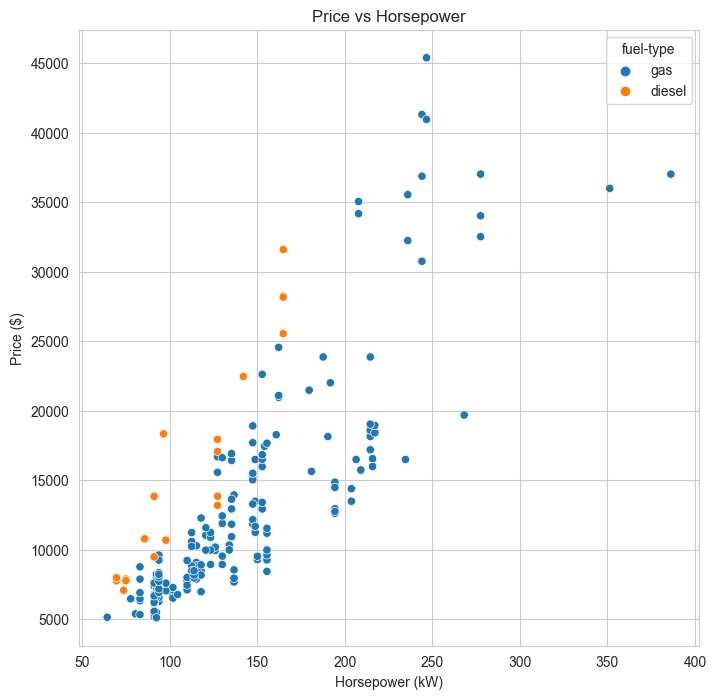

In [362]:
# Create figure and axes
plt.figure(figsize = (8, 8))

# Plot scatter plot of price against horsepower for each fuel type
sns.scatterplot(data = auto_df, x = 'horsepower', y = 'price', hue = 'fuel-type')

# Plot title and axes labels
plt.title('Price vs Horsepower')
plt.xlabel('Horsepower (kW)')
plt.ylabel('Price ($)')

plt.show()

An automobile's external 3D dimensions play a role in the pricing of a vehicle. The greater the dimensions, the pricier a vehicle. Although this means that it the increase is due to an increase in usable space in the car, it is not always true. Evidence of this is shown by the 2 door vehicles which have the same price as their 4 door counterparts despite having a much shorter wheelbase of about half a meter. The price of 2 door vehicles is less dependent on wheelbase. 

There are only 2 vehicles out of 205 with engines located at the rear end, and the prices of such vehicles are higher compared to cars of the same width with engines located at the front. The size of an engine is also positively correlated to a car's dimensions. Looking at cars with at least 6 cylinders, these engines are usually of the V-type and are large. It makes good sense for the width or other dimensions to increase to accommodate these mammoth engines.

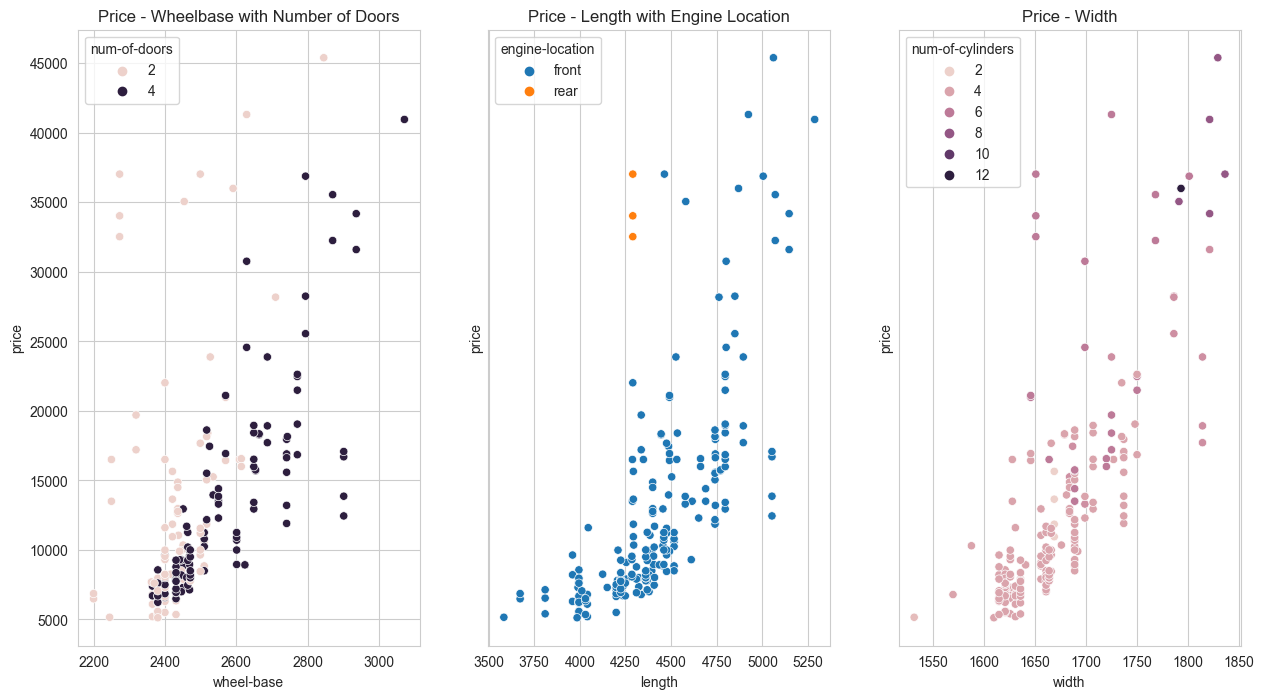

In [363]:
# Create figure and axes
fig, axs = plt.subplots(ncols = 3, figsize = (15, 8))

# Plot scatter plot of price for each wheel base with number of doors
sns.scatterplot(data = auto_df, x = 'wheel-base', y = 'price', hue = 'num-of-doors',  ax = axs[0])

# Plot scatter plot of price for each length with engine location
sns.scatterplot(data = auto_df, x = 'length', y = 'price', hue = 'engine-location',  ax = axs[1])

# Plot a scatter plot of price for each width
sns.scatterplot(data = auto_df, x = 'width', y = 'price', hue = 'num-of-cylinders',  ax = axs[2])

# Hide price axis for the last two plots
axs[1].set(yticks=[])
axs[2].set(yticks=[])

# Set titles for subplots
axs[0].set_title('Price - Wheelbase with Number of Doors')
axs[1].set_title('Price - Length with Engine Location')
axs[2].set_title('Price - Width')

# Show plot
plt.show()

The size of an engine affects its weight which in turn affects the weight of the vehicle. We notice that, without any increase in engine size, forced induction (turbo charged) engines result in in a heavier vehicle compared to standard aspiration engines with a similar volumetric size. A turbo charged engine produces more power compared to a naturally aspirated engine of the same size. With more power, a vehicle needs the right curb weight for its safety.

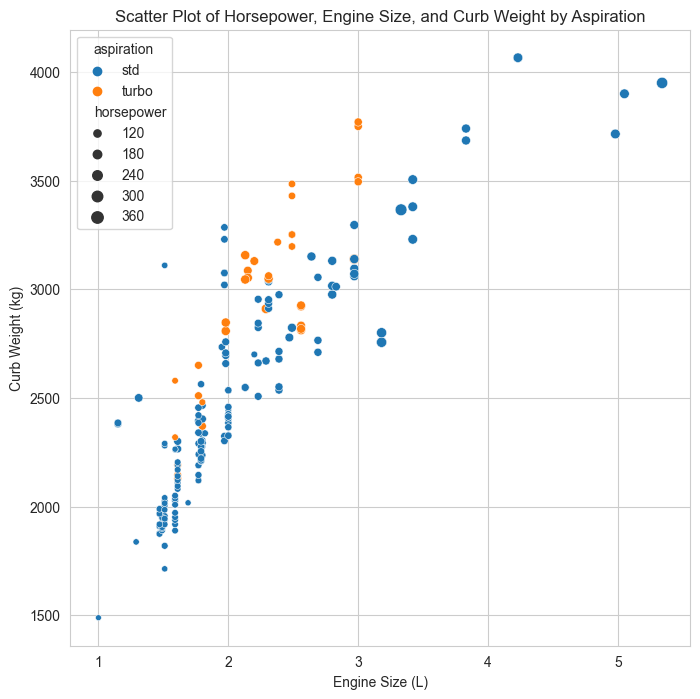

In [364]:
# Create figure and axes
plt.figure(figsize = (8, 8))

# Plot curb-weight and engine-size distinguishing by aspiartion and horsepower
sns.scatterplot(data = auto_df, x = "engine-size", y = "curb-weight", hue = "aspiration", size = "horsepower")

# Set titles and axes titles
plt.title("Scatter Plot of Horsepower, Engine Size, and Curb Weight by Aspiration")
plt.xlabel("Engine Size (L)")
plt.ylabel("Curb Weight (kg)")

plt.show()

Engine size has a significant role in increasing the price of a vehicle. The wheel drive system also has huge impact on the cost of a vehicle.

The affordable cars to drive are those with a forward wheel drive system. Their popularity is also high at about 60%. For a 37% of rear wheel drive cars, the price varies greatly by almost 3 times as much as the forward wheel and 4 wheel drive cars. Rear wheel drive cars also expensive to own than other wheel drive systems.

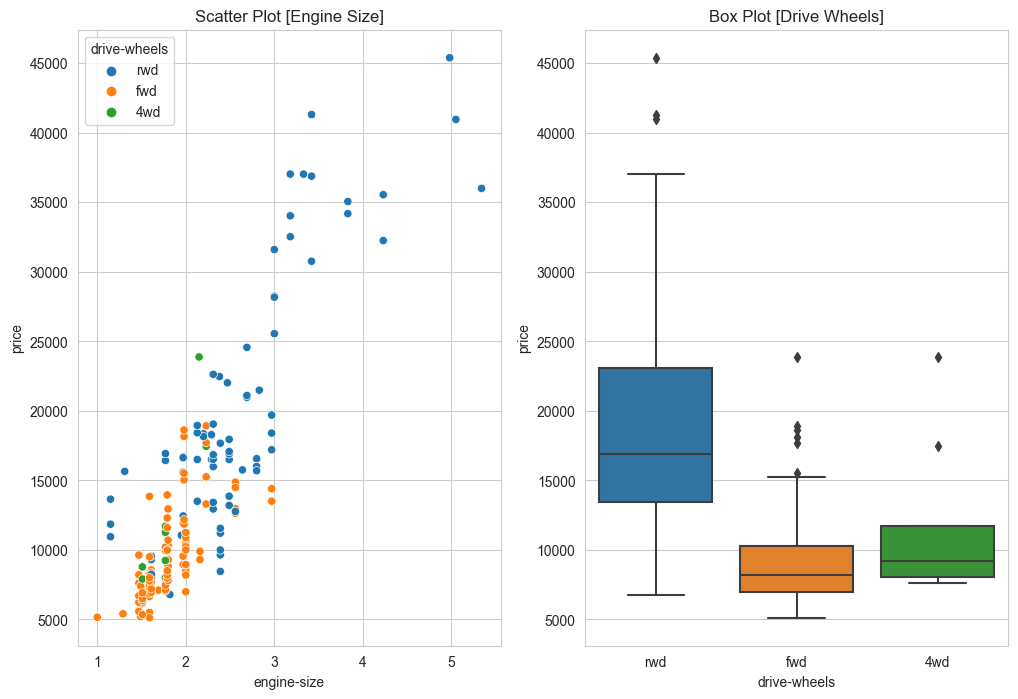

The IQR of RWD is $ 9635.0
The IQR of FWD is $ 3331.25
The IQR of 4WD is $ 3681.0


In [365]:
# Create figure and axes
fig, axs = plt.subplots(ncols = 2, figsize = (12, 8))

# Plot scatter plot
sns.scatterplot(data = auto_df, x = 'engine-size', y = 'price', hue = 'drive-wheels',  ax = axs[0])

#Plot box plots of price for each wheel drive
sns.boxplot(data = auto_df, x = 'drive-wheels', y = 'price',  ax = axs[1])

# Set titles for subplots
axs[0].set_title('Scatter Plot [Engine Size]')
axs[1].set_title('Box Plot [Drive Wheels]')

# Show plot
plt.show()

#find variance each wheel drive's prices
for wd in auto_df["drive-wheels"].unique():
    
    # Subset the DataFrame by wheel-drive and select price column
    wd_df = auto_df[auto_df["drive-wheels"] == wd]["price"]

    # Calculate the IQR
    q1 = wd_df.quantile(0.25)
    q3 = wd_df.quantile(0.75)
    iqr = q3 - q1

    print(f'The IQR of {wd.upper()} is $', iqr)

Forward wheel drive cars are the most popular at almost 60% of cars in the market. Few car makers (Audi, Subaru, and Toyota) have 4 wheel drive vehicles.

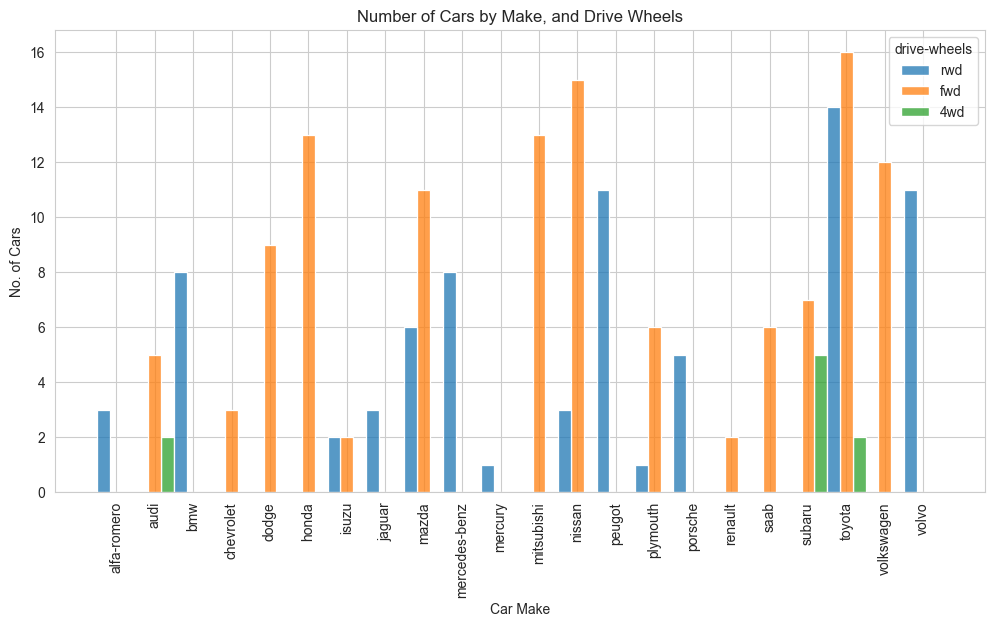

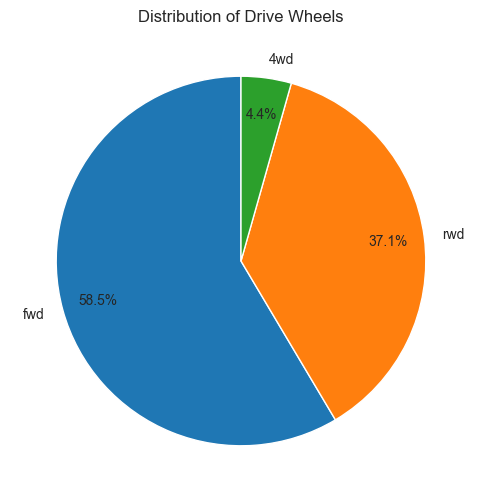

In [366]:
# create a new dataframe with only the columns we need
drive_make_df = auto_df[['make', 'drive-wheels']]

plt.figure(figsize = (12, 6))  # set the figure size

# plot the histogram
sns.histplot(data = drive_make_df, x ='make', hue='drive-wheels', multiple ='dodge')

# customize the plot
plt.title("Number of Cars by Make, and Drive Wheels")
plt.xlabel('Car Make')
plt.ylabel('No. of Cars')
plt.xticks(rotation = 90)
plt.show()

# Count number of cars for each body style
drive_wheels_counts = auto_df['drive-wheels'].value_counts()

# Create pie chart
plt.figure(figsize = (8, 6))
plt.pie(drive_wheels_counts, labels = drive_wheels_counts.index, autopct = '%.1f%%', startangle = 90, pctdistance = 0.8)

# plot titles and axes labels
plt.title('Distribution of Drive Wheels')


plt.show()

The expensive high end cars are Jaguar, Mercedes-Benz, Porsche and BMW all with average prices above \\$25 000. All the car makers drive their vehciles using the rear wheels. Looking at all other car makes, rear wheel drive cars are expensive averaging \\$15 000 compared to front wheel drives at average of \\$10 000 for each car make. Notably, Isuzu cars seem to cost the same regardless of the drive wheel arrangement and also that 50 \% of price values for this make were imputed.

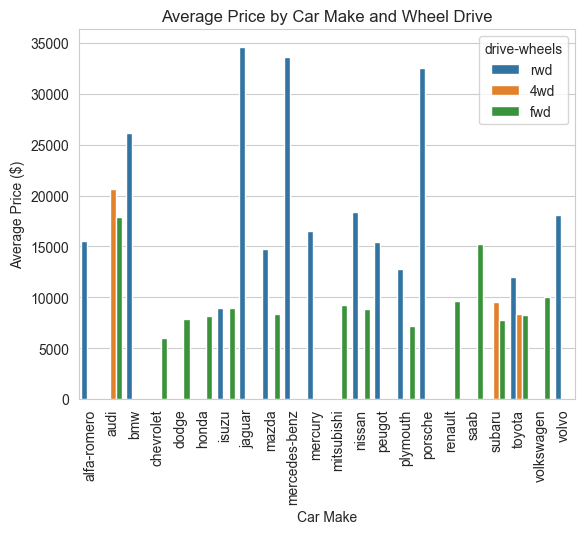

In [367]:
# Group the data by car make and wheel drive, and calculate the mean price
grouped_df = auto_df.groupby(['make', 'drive-wheels'])['price'].mean().reset_index()

# Create bar plot
sns.barplot(data=grouped_df, x='make', y='price', hue='drive-wheels')

# Set title and labels, format labels
plt.xticks(rotation = 90)
plt.title('Average Price by Car Make and Wheel Drive')
plt.xlabel('Car Make')
plt.ylabel('Average Price ($)')

plt.show()

From the whisker plots below, hatchbacks seem to have a low variance seen by the shortest IQR and low average price. Hatchbacks are generally affordable vehicles and have prices that are reliably close to the average price. Convertibles and hardtops vary greatly in price and have the fewer cars in the market.

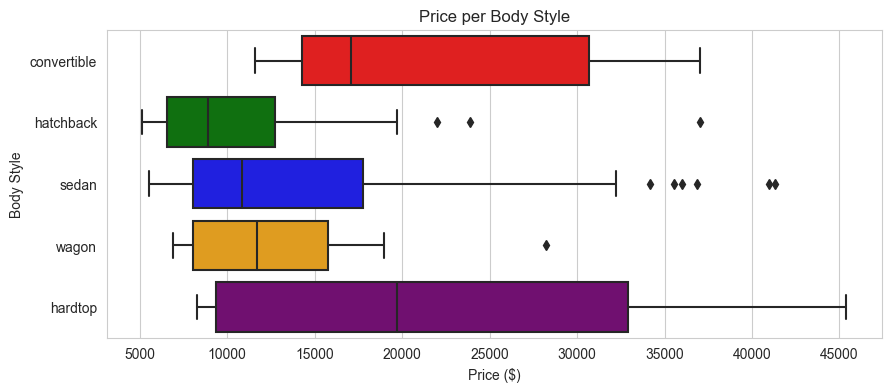

In [368]:
# Define the colours for each body style
colours = {'convertible': 'red', 
          'hatchback': 'green', 
          'sedan': 'blue', 
          'wagon': 'orange', 
          'hardtop': 'purple'}

# Create a new column in the dataframe to map the colours
auto_df['colors'] = auto_df['body-style'].map(colours)

# Plot the boxplots using seaborn
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x = 'price', y = 'body-style', data = auto_df, palette = colours.values())

# plot title and axes labels
plt.title('Price per Body Style')
plt.xlabel('Price ($)')
plt.ylabel('Body Style')

plt.show()

The market has over 80% of cars as sedans and hatchbacks. Notice that hatchbacks are also the cheapest cars in the market. 

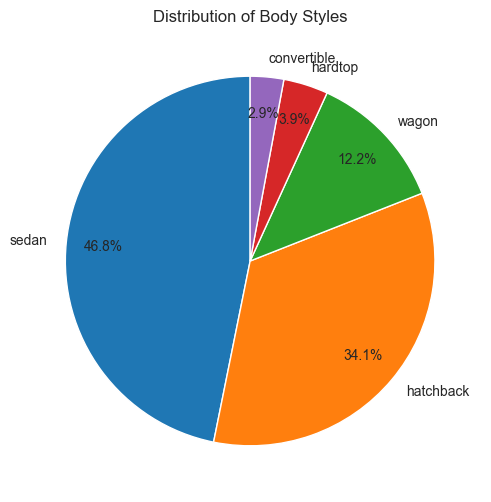

In [369]:
# Count number of cars for each body style
body_style_counts = auto_df['body-style'].value_counts()

# Create pie chart
plt.figure(figsize = (8, 6))
plt.pie(body_style_counts, labels = body_style_counts.index, autopct = '%.1f%%', startangle = 90, pctdistance = 0.8)
plt.title('Distribution of Body Styles')
plt.show()

The greater the size of an engine, the higher the power output. However, the power output also largely depends on the type of an engine being used. Notably, a rotor engine is one of the small sized engines with a higher power to size ratio despite having a few data points (4 rotor engines) for this data and from only 1 car maker. A double overhead cam with values (dohcv) seems to be producing a higher power output, however this cannot be ascertained with only one engine of this type given. Notice that power output is also dependent on the aspiration of the engine which is not indicated in this plot.

In general, ohcv engines are large compared to most engine types.

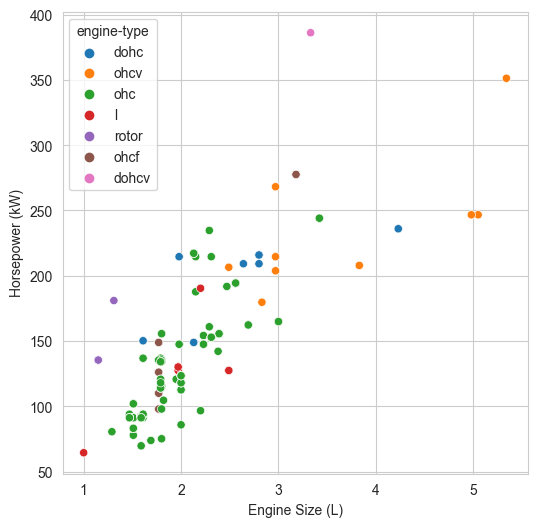

In [370]:
# Create figure and axes
plt.figure(figsize = (6, 6))

# Plot horsepower and engine-size distinguishing by engine type
sns.scatterplot(data = auto_df, x = 'engine-size', y = 'horsepower', hue = 'engine-type')

# plot title and axes labels
plt.xlabel('Engine Size (L)')
plt.ylabel('Horsepower (kW)')

plt.show()

Which engine type is the most popular and why? As a reminder, this data set represents cars manufactured in the 1980s. These conclusions are for this period and will vary with present trends. Double overhead camshaft (dohc) engines are known to be popular today.

Over 7 out of 10 cars have an OHC or Over Head Camshaft engine.

An OHC engine is the most popular because of its simplicity and better performance.

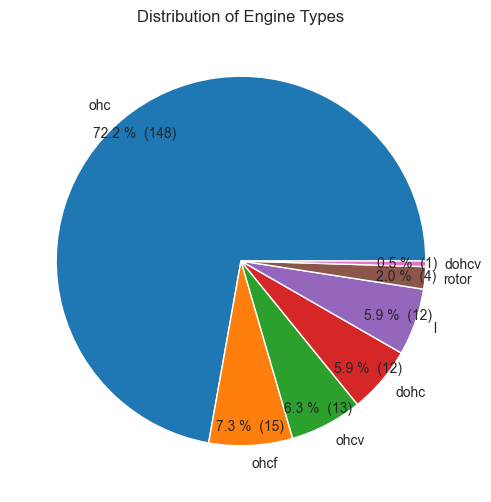

In [371]:
# Count number of cars for each body style
engine_type_counts = auto_df['engine-type'].value_counts()

# Create pie chart
plt.figure(figsize=(6, 6))

autopct_func = lambda p: '{:.1f} %  ({:.0f})'.format(p,(p/100) * engine_type_counts.sum())
plt.pie(engine_type_counts, labels = engine_type_counts.index, autopct=autopct_func, startangle = 0, pctdistance = 0.9)
plt.title('Distribution of Engine Types')
plt.show()

An ohc engine is the most affordable in the market hence the popularity in the market amongst other factors. 

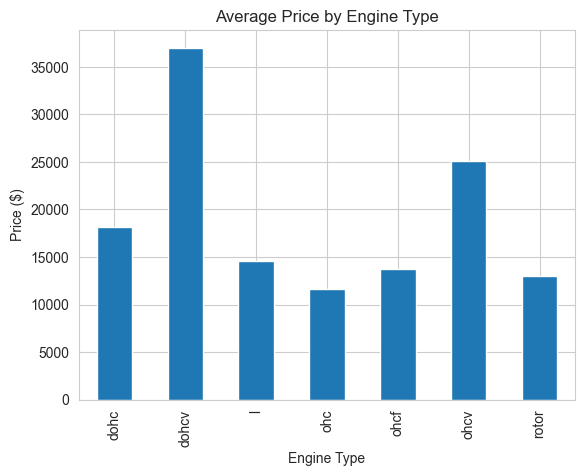

In [372]:
# Group data by engine type and calculate the mean price for each group
engine_prices = auto_df.groupby('engine-type')['price'].mean()

# Create bar chart with engine types on x-axis and mean prices on y-axis
engine_prices.plot(kind='bar')

# Set axis labels and chart title
plt.xlabel('Engine Type')
plt.ylabel('Price ($)')
plt.title('Average Price by Engine Type')

# Display the chart
plt.show()

1 in every 10 cars has excellent safety features and is the safest with a risk or symboling rating of +3. A majority of cars at 32% of the market have average safety features and are considered moderate risk at a rating of 0, while 26% percent of cars are just above average at a rating of +1. Thankfully, there are no cars that are very risky, however, there are vehicles that are risky but have minor features to mitigate risk with arating of -2 at 1.5% of the cras (3 out of 205 cars). 10% of vehicles have safety features that are below average. 

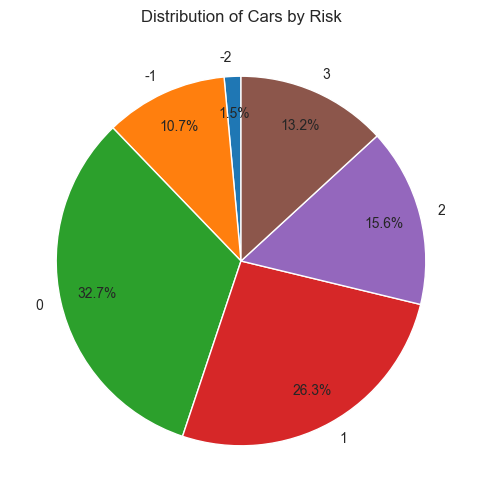

In [373]:
# Group data by symboling value and count cars in each group
symboling_counts = auto_df.groupby('symboling')['symboling'].count()

# Create pie chart
plt.figure(figsize = (8, 6))
plt.pie(symboling_counts, labels = symboling_counts.index, autopct = '%.1f%%', startangle = 90, pctdistance = 0.8)
plt.title('Distribution of Cars by Risk')
plt.show()

One would expect otherwise, however, cars that have above average to good safety features are some of the cheapest cars in the market on average. Expectedly, cars with excellent safety features are pricier on average.

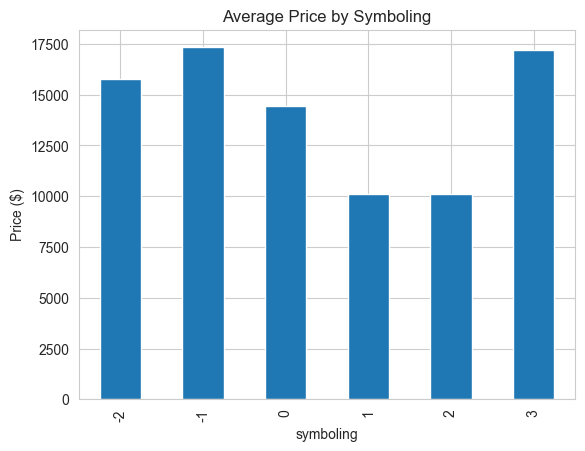

In [374]:
# Group data by symboling and calculate the mean price for each group
symboling_prices = auto_df.groupby('symboling')['price'].mean()

# Create bar chart with symboling on x-axis and mean prices on y-axis
symboling_prices.plot(kind='bar')

# Set axis labels and chart title
plt.xlabel('symboling')
plt.ylabel('Price ($)')
plt.title('Average Price by Symboling')

# Display the chart
plt.show()

Insurance premiums are partially based on the height of a car. Lower cars are more likely to get seriously damaged in accidents than high cars. High cars usually have big or larger diameter wheels, making them less likely to get damaged in collision with smaller cars. There is little correlation between a car's make and the insurances losses associated with it. 

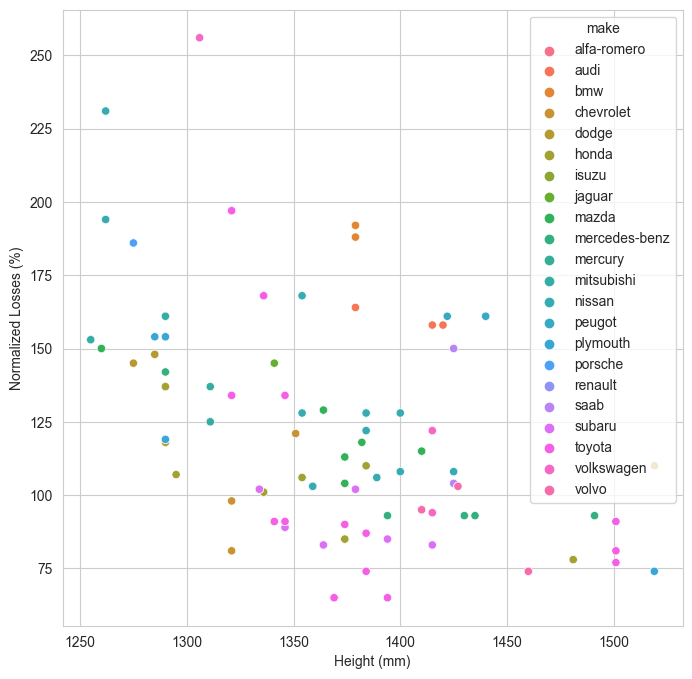

In [375]:
# Create figure and axes
plt.figure(figsize = (8, 8))

# Plot horsepower and engine-size distinguishing by engine type
sns.scatterplot(data = auto_df, y = 'normalized-losses', x = 'height', hue = 'make')

#plot title and axes labels
plt.xlabel('Height (mm)')
plt.ylabel('Normalized Losses (%)')

plt.show()

The bigger an engine is, the more fuel it uses per kilometre for a given speed in both city and highway driving conditions. The difference in fuel consumption between city and highway driving conditions can vary by as much as 5 litres per 100 km. This difference is higher than the total city and highway fuel average consumptions for small engines (less than 1.5 litres).

The spikes or high jumps in both city and highway fuel consumptions seen for small engines are from rotary engines. Rotary engines are light in weight and produce more horsepower than their counterparts of the same size. However, this high power is produced from significantly high volumes of fuel required to drive the engine. Hence these spikes are not an anomaly but a reality with rotary engines.

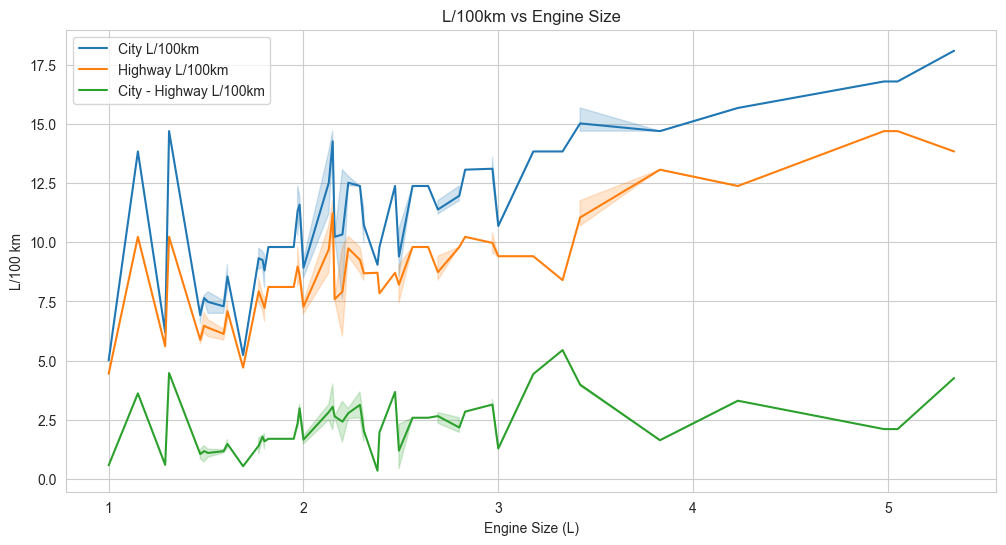

In [376]:
# Create figure and axes
fig, ax = plt.subplots(figsize = (12, 6))

# Plot line graph of city mpg against price
sns.lineplot(data = auto_df, x = 'engine-size', y = 'city-L/100km', ax = ax, label = 'City L/100km')

# Plot line graph of highway mpg against price
sns.lineplot(data = auto_df, x = 'engine-size', y = 'highway-L/100km', ax = ax, label = 'Highway L/100km')

# Plot line graph of highway mpg against price
diff_mpg = auto_df['city-L/100km'] - auto_df['highway-L/100km']
sns.lineplot(data = auto_df, x = 'engine-size', y = diff_mpg, ax = ax, label = 'City - Highway L/100km')


# Set title and axis labels
ax.set_title('L/100km vs Engine Size')
ax.set_xlabel('Engine Size (L)')
ax.set_ylabel('L/100 km')

# Show plot
plt.show()